<div style="text-align: center;">
    <a href="https://www.dataia.eu/">
        <img border="0" src="https://github.com/ramp-kits/template-kit/raw/main/img/DATAIA-h.png" width="90%"></a>
</div>

# Road Accident Severity Prediction

<i> Mohamed Amir Braham , Arij Hajji , Balkis Lassioud , Chemseddine Ben Aziza ,Maha Khadhraoui </i>

## Introduction


#### Where the Data Comes From?

The dataset used in this challenge originates from road accident records. Specifically, it includes various datasets detailing accident characteristics, locations, vehicles involved, and the users (people) involved in each accident. These datasets are merged from different sources, including:

- **Accident Characteristics**: Includes general data about the accident, such as the type of accident, weather conditions, road conditions, and so on.
- **Accident Locations**: Information about where the accident occurred, including geographic coordinates.
- **Vehicles**: Data about the vehicles involved in the accidents (make, model, etc.).
- **Usagers**: Data about the individuals involved in the accidents (e.g., their age, injury severity, etc.).

These datasets are collected and maintained by national or local traffic safety authorities, often used for research and policy-making in road safety.

#### What is the Task This Challenge Aims to Solve?

The task in this challenge is to **predict the severity of road accidents** based on the available information about the accident. The target variable (gravity of the accident) is categorized as:

- **1**: Uninjured
- **2**: Killed
- **3**: Hospitalized injured
- **4**: Slightly injured

The goal is to predict these categories accurately based on the features extracted from the accident data, such as the characteristics of the accident, the location, the vehicles, and the involved individuals.

#### Why Does It Matter?

Predicting accident severity is crucial for multiple reasons:

1. **Improving Road Safety**: By identifying factors that contribute to more severe accidents, authorities can focus their efforts on improving road safety measures, such as better signage, lighting, road maintenance, and enforcement of safety regulations.

2. **Resource Allocation**: Accurate predictions of accident severity can help emergency responders allocate resources more effectively, ensuring that areas with higher likelihoods of severe accidents receive a quicker and more appropriate response.

3. **Policy and Infrastructure Development**: Understanding the factors that lead to more severe accidents can guide policy decisions and infrastructure investments. This may include changes in road design, traffic regulation, and public health initiatives aimed at reducing injuries and fatalities.

4. **Data-Driven Insights**: The challenge of accident severity prediction encourages the use of data analytics to drive decisions. As road accident data grows, leveraging machine learning models to derive actionable insights becomes increasingly important in reducing accidents and improving safety standards.

This task is not just a technical challenge but also an important step toward reducing road accident fatalities and improving public safety.

# Exploratory data analysis

In this section, we will explore the dataset and examine some key characteristics that could give us insights into the structure and nature of the data. The goal is to understand the data better, identify potential patterns, and highlight any important features that could be useful for predictive modeling.

### 1. Load and Describe the Data
   
Let's begin by loading the training data using the download_data function and taking a look at the general structure of the data. We'll inspect the first few rows of the feature set (X_df) and the target variable (y) to get an initial sense of the data.

we will see that the database is composed of 4 tables, as you can see their schema, but our train a is a combination of the four tables 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import sys
sys.path.append("./data")


In [5]:
from download_data import download_data
downloaded_files = download_data()
print(downloaded_files)


URL: https://www.data.gouv.fr/fr/datasets/r/68848e2a-28dd-4efc-9d5f-d512f7dbe66f
Successfully downloaded to data/usagers-2023.csv

URL: https://www.data.gouv.fr/fr/datasets/r/146a42f5-19f0-4b3e-a887-5cd8fbef057b
Successfully downloaded to data/vehicules-2023.csv

URL: https://www.data.gouv.fr/fr/datasets/r/8bef19bf-a5e4-46b3-b5f9-a145da4686bc
Successfully downloaded to data/lieux-2023.csv

URL: https://www.data.gouv.fr/fr/datasets/r/104dbb32-704f-4e99-a71e-43563cb604f2
Successfully downloaded to data/caract-2023.csv
['data/usagers-2023.csv', 'data/vehicules-2023.csv', 'data/lieux-2023.csv', 'data/caract-2023.csv']


In this section we will download the three tables that compose our database, we will after clean them to get a single X_train and X_test

In [6]:
import pandas as pd

usagers_df = pd.read_csv('./data/usagers-2023.csv', sep=';')
vehicules_df = pd.read_csv('./data/vehicules-2023.csv', sep=';')
lieux_df = pd.read_csv('./data/lieux-2023.csv', sep=';', low_memory=False)
caract_df = pd.read_csv('./data/caract-2023.csv', sep=';')

print("Usagers Data:")
print(usagers_df.head())

print("\nVehicules Data:")
print(vehicules_df.head())

print("\nLieux Data:")
print(lieux_df.head())

print("\nCaracteristiques Data:")
print(caract_df.head())


Usagers Data:
        Num_Acc    id_usager  id_vehicule num_veh  place  catu  grav  sexe  \
0  202300000001  203 851 184  155 680 557     A01      1     1     4     1   
1  202300000002  203 851 182  155 680 556     A01      1     1     1     2   
2  202300000002  203 851 183  155 680 556     A01     10     3     3     1   
3  202300000003  203 851 180  155 680 554     B01      1     1     3     1   
4  202300000003  203 851 181  155 680 555     A01      1     1     1     2   

   an_nais  trajet  secu1  secu2  secu3  locp actp  etatp  
0   1978.0       5      2      0     -1    -1   -1     -1  
1   1997.0       9      1      0     -1    -1   -1     -1  
2   1997.0       9      0     -1     -1     2    3      1  
3   1987.0       0      2      6      0     0    0     -1  
4   1984.0       0      1      0      0     0    0     -1  

Vehicules Data:
        Num_Acc  id_vehicule num_veh  senc  catv  obs  obsm  choc  manv  \
0  202300000001  155 680 557     A01     1    30    0     0     5

### 2. Basic Summary

In [7]:
# General info and summary statistics
print("\nUsagers Data Info:")
print(usagers_df.info())
print("\nVehicules Data Info:")
print(vehicules_df.info())
print("\nLieux Data Info:")
print(lieux_df.info())
print("\nCaracteristiques Data Info:")
print(caract_df.info())

# Display basic summary statistics
print("\nUsagers Data Summary:")
print(usagers_df.describe())
print("\nVehicules Data Summary:")
print(vehicules_df.describe())
print("\nLieux Data Summary:")
print(lieux_df.describe())
print("\nCaracteristiques Data Summary:")
print(caract_df.describe())



Usagers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125789 entries, 0 to 125788
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      125789 non-null  int64  
 1   id_usager    125789 non-null  object 
 2   id_vehicule  125789 non-null  object 
 3   num_veh      125789 non-null  object 
 4   place        125789 non-null  int64  
 5   catu         125789 non-null  int64  
 6   grav         125789 non-null  int64  
 7   sexe         125789 non-null  int64  
 8   an_nais      123191 non-null  float64
 9   trajet       125789 non-null  int64  
 10  secu1        125789 non-null  int64  
 11  secu2        125789 non-null  int64  
 12  secu3        125789 non-null  int64  
 13  locp         125789 non-null  int64  
 14  actp         125789 non-null  object 
 15  etatp        125789 non-null  int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 15.4+ MB
None

Vehicules Data Info:
<cla

### Print heads

In [8]:
# print heads
usagers_df.head()

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202300000001,203 851 184,155 680 557,A01,1,1,4,1,1978.0,5,2,0,-1,-1,-1,-1
1,202300000002,203 851 182,155 680 556,A01,1,1,1,2,1997.0,9,1,0,-1,-1,-1,-1
2,202300000002,203 851 183,155 680 556,A01,10,3,3,1,1997.0,9,0,-1,-1,2,3,1
3,202300000003,203 851 180,155 680 554,B01,1,1,3,1,1987.0,0,2,6,0,0,0,-1
4,202300000003,203 851 181,155 680 555,A01,1,1,1,2,1984.0,0,1,0,0,0,0,-1


In [9]:
vehicules_df.head()

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202300000001,155 680 557,A01,1,30,0,0,5,1,1,NaN
1,202300000002,155 680 556,A01,2,7,0,1,1,1,1,NaN
2,202300000003,155 680 554,B01,1,2,0,2,1,16,1,NaN
3,202300000003,155 680 555,A01,2,7,0,2,2,15,1,NaN
4,202300000004,155 680 551,B01,1,7,0,2,9,2,4,NaN


In [10]:
lieux_df.head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,3,5,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50


In [11]:
caract_df.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"


In [12]:
print(usagers_df.columns)

print(vehicules_df.columns)

print(lieux_df.columns)

print(caract_df.columns)

Index(['Num_Acc', 'id_usager', 'id_vehicule', 'num_veh', 'place', 'catu',
       'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp',
       'actp', 'etatp'],
      dtype='object')
Index(['Num_Acc', 'id_vehicule', 'num_veh', 'senc', 'catv', 'obs', 'obsm',
       'choc', 'manv', 'motor', 'occutc'],
      dtype='object')
Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'vosp', 'prof',
       'pr', 'pr1', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'vma'],
      dtype='object')
Index(['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long'],
      dtype='object')


## Database Schema
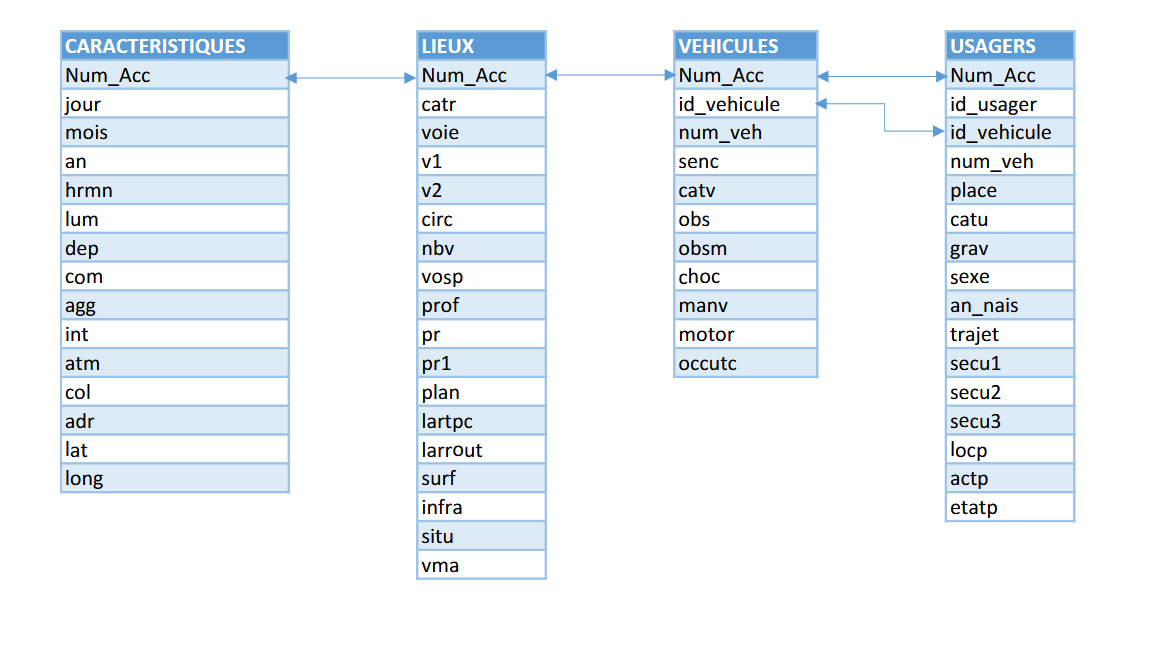

### 3. Loading our train

In [14]:
import problem
X_df, y = problem.get_train_data()
print(X_df.shape)
print(y.shape)

(104656, 55)
(104656,)


In [15]:
# index is num_acc
X_df.set_index('id_usager', inplace=True)
X_df.head()

,Num_Acc,id_vehicule,num_veh_x,place,catu,sexe,an_nais,trajet,secu1,secu2,...,lum,dep,com,agg,int,atm,col,adr,lat,long
id_usager,,,,,,,,,,,,,,,,,,,,,
203 727 183,202300052111,155 588 114,C01,2,2,2,2001.0,5,1,-1,...,1,53,53219,2,1,3,5,RN12,"48,31022000","-0,69458000"
203 733 772,202300049380,155 592 957,B01,1,1,1,1972.0,1,2,6,...,1,13,13113,1,1,1,2,A51,"43,58144800","5,47578300"
203 743 616,202300045261,155 600 248,A01,10,3,2,1949.0,5,0,-1,...,1,31,31069,2,1,1,6,PASTEUR (RUE),"43,63435000","1,39139000"
203 756 903,202300039714,155 610 130,B01,2,2,1,1999.0,5,1,0,...,5,971,97113,1,1,1,4,RN4-ROND POINT SAINT FELIX,"16,20775000","-61,46160000"
203 748 351,202300043315,155 603 749,B01,1,1,1,1997.0,1,2,8,...,1,75,75113,2,3,1,3,RUE JENNER,"48,83449900","2,36384500"


Our target variable is the severity of the accident also known as GRAV for 'gravité'

### 4. Data Visualization

In [16]:
print('the columns are : ', X_df.columns)

the columns are :  Index(['Num_Acc', 'id_vehicule', 'num_veh_x', 'place', 'catu', 'sexe',
       'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp',
       'num_veh_y', 'senc', 'catv', 'obs', 'obsm', 'choc', 'manv', 'motor',
       'occutc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'vosp', 'prof',
       'pr', 'pr1', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'vma', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg', 'int',
       'atm', 'col', 'adr', 'lat', 'long'],
      dtype='object')


In [17]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104656 entries, 203 727 183 to 203 815 021
Data columns (total 54 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      104656 non-null  int64  
 1   id_vehicule  104656 non-null  object 
 2   num_veh_x    104656 non-null  object 
 3   place        104656 non-null  int64  
 4   catu         104656 non-null  int64  
 5   sexe         104656 non-null  int64  
 6   an_nais      102509 non-null  float64
 7   trajet       104656 non-null  int64  
 8   secu1        104656 non-null  int64  
 9   secu2        104656 non-null  int64  
 10  secu3        104656 non-null  int64  
 11  locp         104656 non-null  int64  
 12  actp         104656 non-null  object 
 13  etatp        104656 non-null  int64  
 14  num_veh_y    104656 non-null  object 
 15  senc         104656 non-null  int64  
 16  catv         104656 non-null  int64  
 17  obs          104656 non-null  int64  
 18  obsm         1

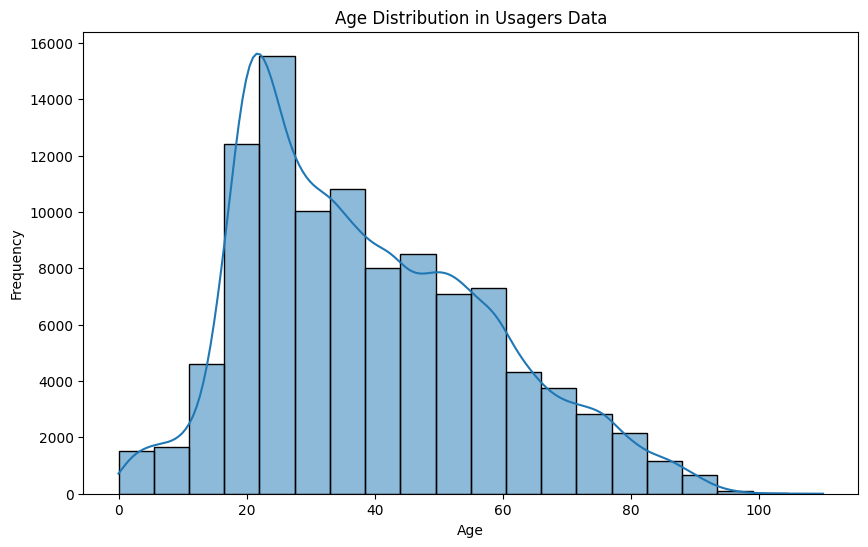

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


X_df['age'] = X_df['an_nais'].apply(lambda x: 2023 - x)

# Visualize the distribution of a numerical column (e.g., age in the 'usagers' dataset)
plt.figure(figsize=(10, 6))
sns.histplot(X_df['age'], kde=True, bins=20)
plt.title('Age Distribution in Usagers Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



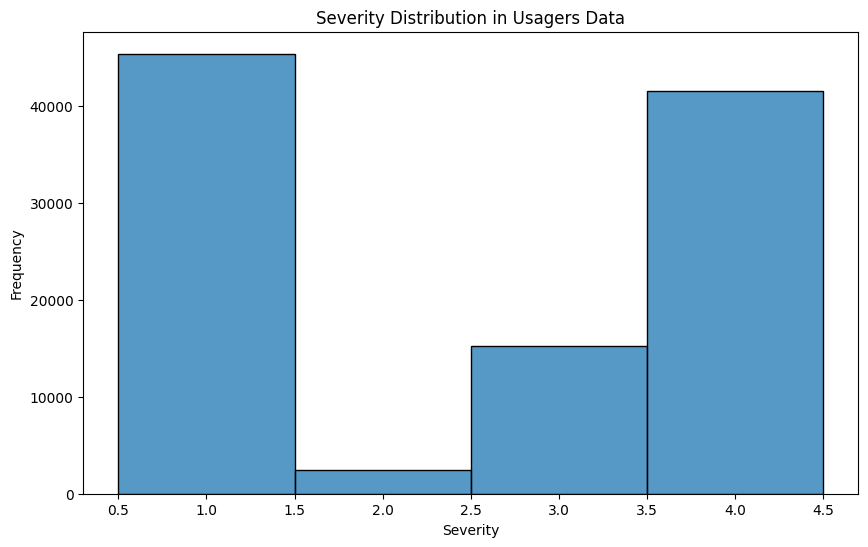

In [ ]:
# plot histogram of y 
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=4, discrete = True)
plt.title('Severity Distribution in Usagers Data')
plt.xlabel('Severity')
plt.ylabel('Frequency')

plt.show()

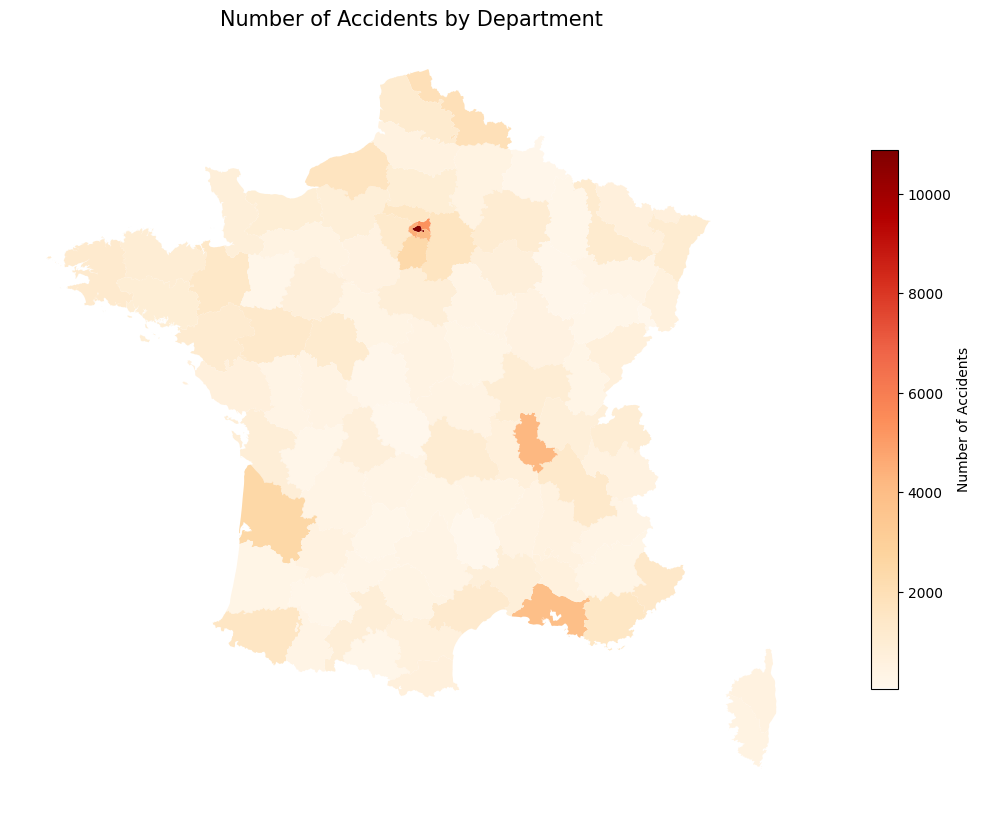

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Assume X_df and y are already defined. Here, X_df is your DataFrame with features,

df = X_df.copy()


dept_counts = df.groupby('dep').size().reset_index(name='accident_count')

# Load French department geometries from your GeoJSON file
geojson_path = "contour-des-departements.geojson"
france_map = gpd.read_file(geojson_path)

# Standardize the department code format in both the geo dataframe and accident dataframe.
france_map['code'] = france_map['code'].astype(str).str.zfill(2)
dept_counts['dep'] = dept_counts['dep'].astype(str).str.zfill(2)

# Merge the accident counts with the spatial data.
map_data = france_map.merge(dept_counts, left_on='code', right_on='dep', how='left')

# Replace missing accident_count values (departments without any accident)
map_data['accident_count'] = map_data['accident_count'].fillna(0)

# Plot the geographic map with accident counts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
map_plot = map_data.plot(
    column='accident_count', 
    ax=ax, 
    legend=True,
    cmap='OrRd',
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "No Data"
    },
    legend_kwds={'label': "Number of Accidents", 'shrink': 0.7}
)
ax.set_title('Number of Accidents by Department', fontsize=15)
ax.axis('off')

plt.savefig('accidents_by_department.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
df_grav = usagers_df['grav']

0         4
1         1
2         3
3         3
4         1
         ..
125784    4
125785    1
125786    1
125787    1
125788    3
Name: grav, Length: 125789, dtype: int64

In [30]:
df = pd.concat([df, df_grav])

In [39]:
print(df.shape)
print(df_grav.shape)

(104656, 55)
(125789,)


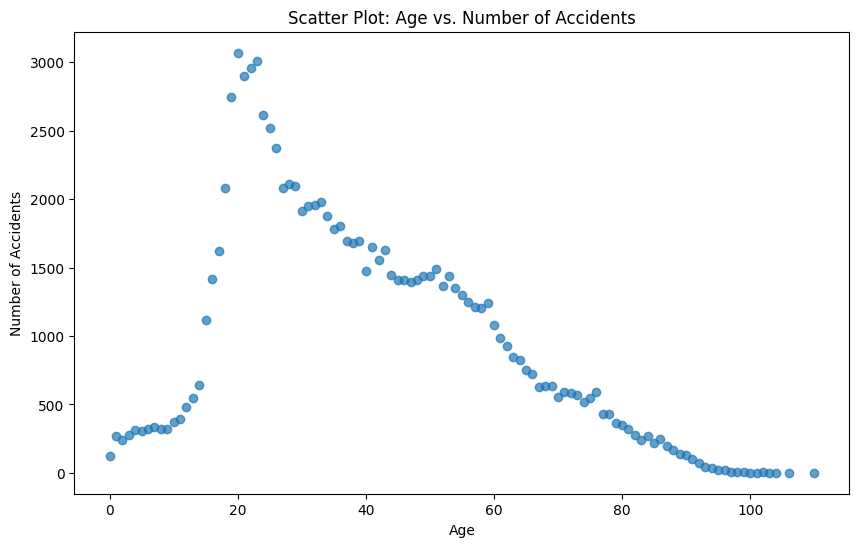

In [ ]:
accident_counts = X_df.groupby("age").size().reset_index(name="accident_count")


plt.figure(figsize=(10, 6))
plt.scatter(accident_counts["age"], accident_counts["accident_count"], alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Number of Accidents")
plt.title("Scatter Plot: Age vs. Number of Accidents")
plt.show()


In [ ]:
grav = X_df.copy()
grav['grav'] = y

   age  accident_count
0  0.0             124
1  1.0             267
2  2.0             238
3  3.0             276
4  4.0             312


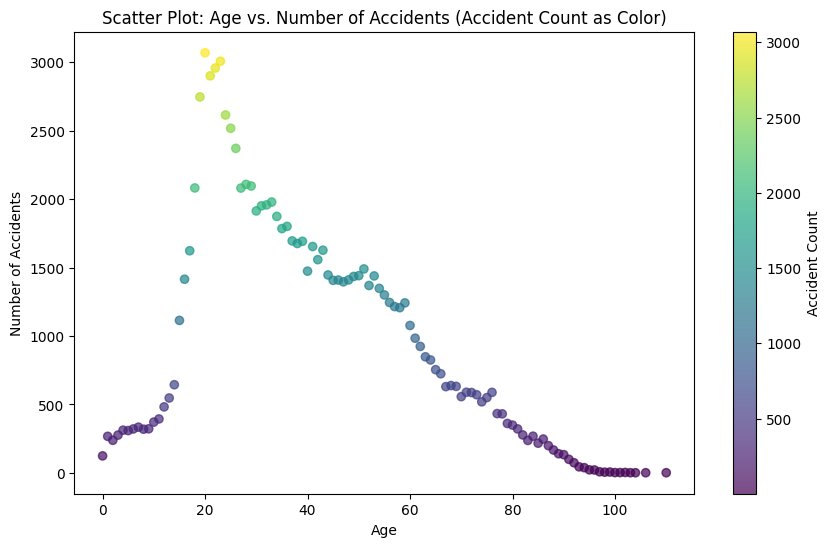

In [46]:
import pandas as pd

# Example: Count the number of accidents per age (assuming each row is an accident)
accident_counts = grav.groupby("age").size().reset_index(name="accident_count")
print(accident_counts.head())

# Then plot using the aggregated DataFrame
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(accident_counts["age"],
                      accident_counts["accident_count"],
                      c=accident_counts["accident_count"],  # if you want to use accident counts for color
                      cmap="viridis",
                      alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Number of Accidents")
plt.title("Scatter Plot: Age vs. Number of Accidents (Accident Count as Color)")

cbar = plt.colorbar(scatter)
cbar.set_label("Accident Count")

plt.show()


### 5. Correlation Heatmap

/home/infres/benaziza-22/anaconda3/envs/ima/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


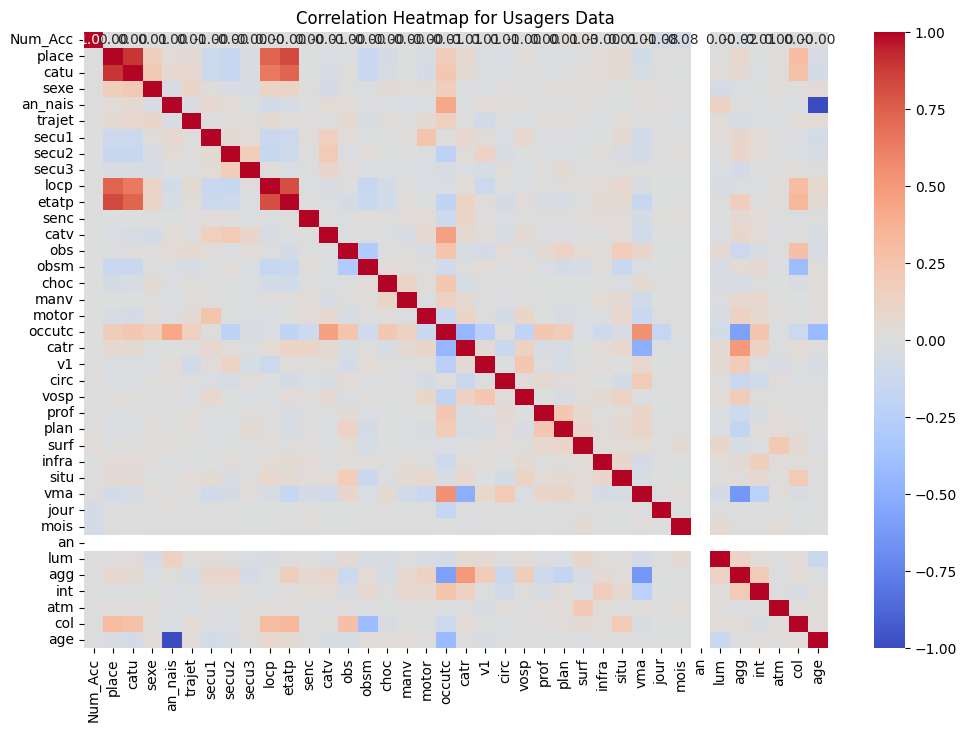

In [34]:
# Select only numeric columns for correlation calculation
numeric_columns = X_df.select_dtypes(include=[np.number]).columns
correlation_matrix = X_df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Usagers Data')
plt.show()


### 6. Handling Outliers



In [25]:
Q1 = usagers_df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = usagers_df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Define the outlier condition
outlier_condition = ((usagers_df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) |
                     (usagers_df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

# Impute outliers with the median value for each column
usagers_df_clean = usagers_df.copy()

# Impute numeric columns with median
for col in usagers_df.select_dtypes(include=[np.number]).columns:
    median_value = usagers_df[col].median()
    usagers_df_clean[col] = np.where(outlier_condition[col], median_value, usagers_df_clean[col])


In [26]:
Q1 = lieux_df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = lieux_df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((lieux_df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) |
                     (lieux_df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

lieux_df_clean = lieux_df.copy()

for col in lieux_df.select_dtypes(include=[np.number]).columns:
    median_value = lieux_df[col].median()
    lieux_df_clean[col] = np.where(outlier_condition[col], median_value, lieux_df_clean[col])


In [27]:
Q1 = vehicules_df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = vehicules_df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((vehicules_df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) |
                     (vehicules_df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

vehicules_df_clean = vehicules_df.copy()

for col in vehicules_df.select_dtypes(include=[np.number]).columns:
    median_value = vehicules_df[col].median()
    vehicules_df_clean[col] = np.where(outlier_condition[col], median_value, vehicules_df_clean[col])


In [29]:
Q1 = caract_df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = caract_df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((caract_df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) |
                     (caract_df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

caract_df_clean = caract_df.copy()

for col in caract_df.select_dtypes(include=[np.number]).columns:
    median_value = caract_df[col].median()
    caract_df_clean[col] = np.where(outlier_condition[col], median_value, caract_df_clean[col])


### 7. Merging datasets


In [ ]:
# Here we recreate ou database 

print("Merging datasets...")
df = usagers_df.copy()

df = df.merge(vehicules_df, on=["Num_Acc", "id_vehicule"], how="left")
df = df.merge(lieux_df, on="Num_Acc", how="left")
df = df.merge(caract_df, on="Num_Acc", how="left")
df = df.loc[:, ~df.columns.duplicated()]

print(f"Full merged dataset shape before filtering: {df.shape}")

# Remove rows with invalid 'grav' values (-1)
print(f"Number of rows with grav=-1: {(df['grav'] == -1).sum()}")
df = df[df['grav'].isin([1, 2, 3, 4])]
print(f"Dataset shape after filtering out invalid grav values: {df.shape}")



Merging datasets...
Full merged dataset shape before filtering: (163683, 56)
Number of rows with grav=-1: 156
Dataset shape after filtering out invalid grav values: (163527, 56)


# Challenge evaluation



## Evaluation Metrics

In this project, we use the **F1 Score** to evaluate our model instead of just relying on **Accuracy**.

**Accuracy** measures the percentage of correct predictions:
$$
\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
$$

While accuracy is useful, it can be misleading in situations with class imbalance (e.g., many minor accidents vs. few severe ones). The **F1 Score** combines precision and recall into a single metric, which is especially important when the cost of false negatives (missing a severe accident) or false positives is high.

The **F1 Score** is defined as:
$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

This metric gives a better picture of performance when dealing with imbalanced classes, ensuring that both the detection of severe accidents (recall) and the accuracy of severe labels (precision) are properly balanced.


# Submission format



1. **Prediction Format:**
Participants should submit their predictions in a CSV file. The format should contain the following columns:

- **Num_Acc:** The unique identifier for each accident (from the original dataset).
- **grav:** The predicted gravity of the accident (the target variable) with values in the range of [1, 2, 3, 4], representing the following categories:
  - 1: Uninjured
  - 2: Killed
  - 3: Hospitalized injured
  - 4: Slightly injured

The structure of the CSV file should look like this:

| Num_Acc | grav |
|---------|------|
| 12345   | 2    |
| 67890   | 3    |
| 23456   | 1    |
| 34567   | 4    |
| ...     | ...  |


2. **File Naming Convention:**
The file should be named in the following format:


Where `<model_name>` is the name you give to your model or submission (e.g., `submission_rf_model.csv` or `submission_xgb_model.csv`).

3. **How to Submit:**
- Prepare your submission file in the format outlined above.
- Upload your file on the RAMP platform (as per the competition’s submission instructions).


## The pipeline workflow [todo]

The input data are stored in a dataframe. To go from a dataframe to a numpy array we will use a scikit-learn column transformer. The first example we will write will just consist in selecting a subset of columns we want to work with.

In [ ]:
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [ ]:
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(
            StandardScaler(),
           ),  
         numerical_cols),
        
        ('cat', make_pipeline(
            SimpleImputer(strategy='constant', fill_value='missing'),
            OneHotEncoder(handle_unknown='ignore', sparse_output=True)),
         categorical_cols)
    ])

## Feature Selection:

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

pipeline = make_pipeline(preprocessor, rf_model)


X = merged_df[numerical_cols + categorical_cols]  
y = merged_df['grav']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_batch = X_train[:10000] 
y_train_batch = y_train[:10000]  

pipeline.fit(X_train_batch, y_train_batch)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

rf_model = pipeline.named_steps['randomforestclassifier']
importances = rf_model.feature_importances_
print("Feature Importances:", importances)


Accuracy: 0.8477
Feature Importances: [8.92024426e-03 6.66202968e-03 5.68802727e-03 ... 1.84289317e-04
 2.08510444e-05 3.37937186e-06]


In [66]:

num_feature_names = numerical_cols  
cat_feature_names = preprocessor.transformers_[1][1].named_steps['onehotencoder'].get_feature_names_out(categorical_cols) 

all_feature_names = list(num_feature_names) + list(cat_feature_names)

rf_model = pipeline.named_steps['randomforestclassifier']
importances = rf_model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Important Features (Sorted by Importance):")
print(feature_importance)

top_n = 10
print(f"\nTop {top_n} Important Features:")
print(feature_importance.head(top_n))


Important Features (Sorted by Importance):
                         Feature  Importance
3                           grav    0.179455
7                          secu1    0.027810
12                           age    0.011210
5                        an_nais    0.010441
8                          secu2    0.009781
...                          ...         ...
54786  id_vehicule_y_155 664 770    0.000000
1594       id_usager_203 741 737    0.000000
44185            long_3,50233249    0.000000
7937       id_usager_203 827 271    0.000000
9076       id_usager_203 842 722    0.000000

[61691 rows x 2 columns]

Top 10 Important Features:
             Feature  Importance
3               grav    0.179455
7              secu1    0.027810
12               age    0.011210
5            an_nais    0.010441
8              secu2    0.009781
0            Num_Acc    0.008920
13              jour    0.007382
20               col    0.007088
19091  num_veh_x_B01    0.007056
6             trajet    0.006955


### Selected Columns :

In [67]:
from sklearn.compose import ColumnTransformer

top_n_features = feature_importance.head(10)['Feature'].values  

selected_cols = [col for col in top_n_features if col in merged_df.columns]

if len(selected_cols) > 0:
    X_selected = merged_df[selected_cols]
else:
    print("No valid features found in merged_df")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(
            StandardScaler(),
            ),  
         [col for col in selected_cols if col in numerical_cols]), 
        
        ('cat', make_pipeline(
            SimpleImputer(strategy='constant', fill_value='missing'),
            OneHotEncoder(handle_unknown='ignore', sparse_output=True)),
         [col for col in selected_cols if col in categorical_cols])  
    ])

X_selected_transformed = preprocessor.fit_transform(X_selected)

print("Transformed data shape:", X_selected_transformed.shape)



Transformed data shape: (309341, 9)


In [69]:

X_selected_transformed_dense = X_selected_transformed.toarray() if hasattr(X_selected_transformed, 'toarray') else X_selected_transformed

column_names = (
    [col for col in selected_cols if col in numerical_cols] + 
    [f"{col}_{category}" for col in selected_cols if col in categorical_cols for category in preprocessor.transformers_[1][1].named_steps['onehotencoder'].get_feature_names_out([col])]
)

X_selected_transformed_df = pd.DataFrame(X_selected_transformed_dense, columns=column_names)

print(X_selected_transformed_df.head())


       grav     secu1       age   an_nais     secu2   Num_Acc      jour  \
0  1.108893  0.014240  0.348779 -0.348779 -0.316448 -1.738122 -0.958061   
1  1.108893  0.014240  0.348779 -0.348779 -0.316448 -1.738122 -0.958061   
2 -1.035167 -0.412734 -0.683068  0.683068 -0.316448 -1.738059 -0.958061   
3  0.394206 -0.839709 -0.683068  0.683068 -0.653396 -1.738059 -0.958061   
4  0.394206  0.014240 -0.139991  0.139991  1.705243 -1.737995 -0.958061   

        col    trajet  
0  2.224678  0.683846  
1  2.224678  0.683846  
2  1.604439  2.118974  
3  1.604439  2.118974  
4 -1.496758 -1.110065  


## Testing using a scikit-learn pipeline

In [71]:
from sklearn.model_selection import cross_val_score

def get_estimator():
    return RandomForestClassifier(n_estimators=100, random_state=42)  

X_selected_transformed_sampled = X_selected_transformed[:10000]
y_sampled = y[:10000]

scores = cross_val_score(get_estimator(), X_selected_transformed_sampled, y_sampled, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation accuracy scores: [0.9995 1.     1.     1.     1.    ]
Mean accuracy: 0.9999


## Submission

To submit your code, you can refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html).